In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


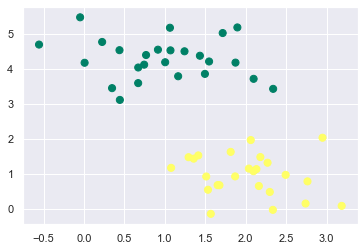

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50,centers=2,
                random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer');


(50,)

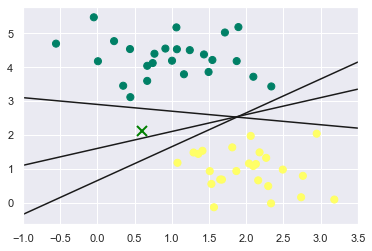

In [10]:
## Many Possible Separators: 
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
plt.plot([0.6],[2.1],'x',color='green',markeredgewidth=2,markersize=10)

for m,b in[(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
    
plt.xlim(-1,3.5);

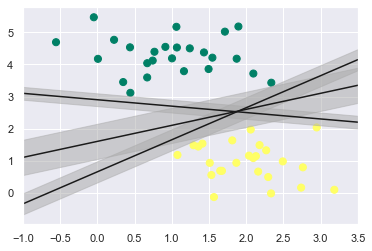

In [19]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',
                    color='#AAAAAA',alpha=0.5)
    
plt.xlim(-1,3.5);

In [24]:
from sklearn.svm import SVC ## Support Vector Classifier
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    '''Plot the decision function for a 2D SVC'''
    if ax is None:
        ax=plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #Create grid to evaluate model
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #PLot decision bpundary and margins
    ax.contour(X,Y,P,colors='k',
               levels=[-1,0,1],alpha=0.5,
              linestyles=['--','--'])
    
    #PLot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300, linewidth=1,facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

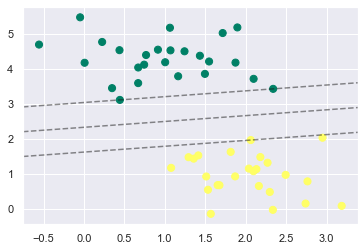

In [28]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
plot_svc_decision_function(model);

In [30]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## Example: Face Recognition

In [31]:
from sklearn.datasets import fetch_lfw_people

faces= fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


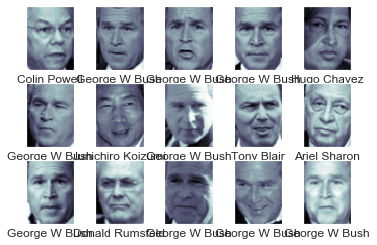

In [32]:
fig , ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],
           xlabel=faces.target_names[faces.target[i]])

In [34]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca,svc)

In [37]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data,faces.target, random_state=42)

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1,5,10,50],
             'svc__gamma':[0.0001, 0.0005,0.0001, 0.0005]}
grid = GridSearchCV(model,param_grid)
%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)

Wall time: 49.2 s
{'svc__C': 10, 'svc__gamma': 0.0005}


model = grid.best_estimator_
yfit = model.predict(Xtest)

In [43]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

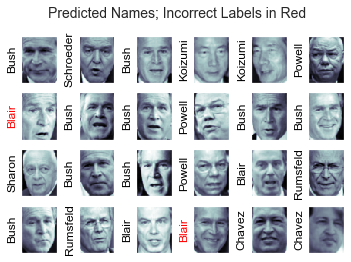

In [44]:
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47), cmap = 'bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='black' if yfit[i]==ytest[i] else 'red')
    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [45]:
from sklearn.metrics import classification_report

print(classification_report(ytest,yfit,
                           target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.87      0.76        15
     Colin Powell       0.83      0.87      0.85        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.97      0.79      0.87       126
Gerhard Schroeder       0.68      0.91      0.78        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.85      0.98      0.91        42

         accuracy                           0.85       337
        macro avg       0.81      0.87      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(89.18, 0.5, 'Predicted Label')

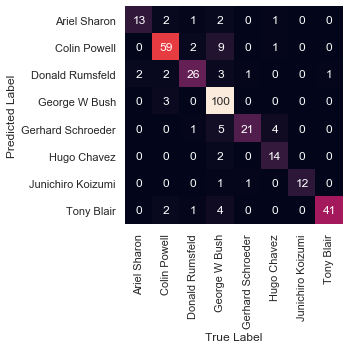

In [46]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False,
           xticklabels=faces.target_names,
           yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')